In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [172]:
class regresion_lineal:   
    def __init__(self, path, filename):
        
        #############################################
        ## Se carga la informacion en formato .npy ##
        #############################################        
        self.data_array = np.load(path+filename)
        self.df = pd.DataFrame(self.data_array)

        ###########################################################
        ## Se calcula el valor del porcentaje para entrenamiento ##
        ###########################################################
        porcentaje_80 = int(len(self.df) * .80)
                         
        #####################################################
        ## Se crean los dataset de entrenamiento y pruebas ##
        #####################################################
        self.df_entrenamiento = pd.DataFrame(self.df[:porcentaje_80])
        self.df_prueba = pd.DataFrame(self.df[porcentaje_80:])

        ######################################################################
        ## Se ejecuta el analisis exploratorio para el set de entrenamiento ##
        ######################################################################
        #self.analisis_exploratorio(self.df_entrenamiento)
        
        #####################################
        ## Se grafican todas las variables ##
        #####################################
        #self.graficaDataFrame(self.df_entrenamiento)

        ##############################################
        ## Se calcula el coeficiente de correlacion ##
        ##############################################
        #self.comparaVariables(self.df_entrenamiento)
        
        #################################################       
        ## Se genera regresion                         ##
        #regresion(self, x, y, epoch, error_int, lrate)##
        #################################################
        
        error,betas = (self.regresion(self.df_entrenamiento[1],self.df_entrenamiento[4],5000,1000,0.0000005))
        self.errorintime(error)
        
        
        ####################################
        #######################################
       # lm_1 = LinearRegression()
       # lm_1.fit(self.df_entrenamiento[0].values.reshape(-1,1),self.df_entrenamiento[1].values.reshape(-1,1))
       # print(lm_1.coef_)
       # print(lm_1.intercept_)
    
    def evolucionModelo(self,modelo,print_int): #evolucion de modelo
        x = []
        y = []       
        
        imprimir = print_int
        for fila in error:
            result = fila.values()
            data =list(result)             

            if(fila == imprimir):               
                plt.title("Evolución en el Tiempo")
                plt.xlabel("Iteraciones")
                plt.ylabel("Error")   
                plt.plot(data[0],data[1],'kd',color="green")
                imprimir += print_int 
                
            
    def errorintime(self,error): #grafica cambio de error en el tiempo
        x = []
        y = []       

        for fila in error:
            result = fila.values()
            data =list(result)             
            x.append(data[0])
            y.append(data[1])                    
        
        plt.title("Error en el Tiempo")
        plt.xlabel("Iteraciones")
        plt.ylabel("Error")   
        plt.plot(x,y,'kd',color="red")

        
    def regresion(self, x, y, epoch, error_int, lrate): #preparacion de informacion para las iteraciones
        b0 = 5#np.random.random()
        b1 = 1#.random.random()
        xdiccionario = {'x':x,'y':1}
        xmatrix = pd.DataFrame(xdiccionario)
        ydiccionario = {'x':y,'y':1}
        ymatrix = pd.DataFrame(ydiccionario)              
      
        #ejecutamos las iteraciones
        iteracion = 1
        intervalo_error = error_int
        errArray=[]
        modeloArray=[]
        n = len(x)
        
        while iteracion <= epoch:
            ###Inicializo arreglos
            predicciony=[]            
            errory=[]           
            gradienteError=[]    
            
            ##################
            ## Prediccion Y ##
            ##################
            for i in range(len(xmatrix)):
                value =(xmatrix.loc[i,'x'] * b1) + (xmatrix.loc[i,'y'] * b0)
                predicciony.append(value)
            
            ##############################
            ## Error; gradiente ##
            ##############################
            for i in range(len(ymatrix)):
                error = np.power(ymatrix.loc[i,'x'] - predicciony[i],2)               
                errory.append(error) 
                
                gradiente = ymatrix.loc[i,'x'] - predicciony[i]
                gradienteError.append(gradiente)
                        
            err =  (1 / (2 * n)) * sum(errory)       
            grad = (1/ n) * sum(gradienteError)
            
            
            b0 = b0 - lrate * grad
            b1 = b1 - lrate * grad
            
            if (iteracion == intervalo_error):
                print("Iteracion:",iteracion,', Error:',err)
                intervalo_error +=error_int
            
            
            #almacenamos error por iteracion
            epochDic = {'iteracion:':iteracion,'error':err}
            modeloDic ={'iteracion:':iteracion,'m': b0,'b':b1}
            errArray.append(epochDic)
            modeloArray.append(modeloDic)
            iteracion +=1
            
        return(errArray,modeloArray)

    def comparaVariables(self, df):
        #data = self.coeficienteCorrelacionP(df)
        

        for columna in df.columns:
            x = "Valores de: "+str(columna)
            for col in df.columns:
                if(columna != col):
                    y = "Valores de: "+str(col)
                    coeficiente = self.coeficienteCorrelacion(df[columna],df[col])
                    plt.figure()
                    plt.title("Coeficiente Correlacion "+str(coeficiente))
                    plt.xlabel(x)
                    plt.ylabel(y)                
                    plt.scatter(df[columna],df[col])
        
               
    def coeficienteCorrelacionP(self,df): #se calcula coeficiente de correlacion pandas
        return df.corr(method="pearson")
               
        
    def coeficienteCorrelacion(self, dfx, dfy): #Se calculan coeficiente de correlacion numpy
        coeficiente = np.corrcoef(dfx,dfy) [1,0]      
        return coeficiente
        

    def graficaDataFrame(self,df):
        for columna in df.columns:
            plt.figure()
            sns.histplot(df[columna])
    
    def analisis_exploratorio(self,df):        
        print("Media\n",self.media(df))
        print("Maximo\n",self.numeroMaximo(df))
        print("Minimo\n",self.numeroMinimo(df))
        print("Rango\n",self.rango(df))
        print("Desviacion\n",self.desviacionEstandar(df))
            
    def media(self, df):
        return pd.DataFrame.median(df,axis=0)
    
    def numeroMaximo(self,df):
        return pd.DataFrame.max(df,axis=0)
    
    def numeroMinimo(self,df):
        return pd.DataFrame.min(df,axis=0)
    
    def rango(self,arr):
        return np.ptp(arr,axis=0)
    
    def desviacionEstandar(self,df):
        return pd.DataFrame.std(df,axis=0) 

<ipython-input-168-eb3bf1ad51b3>:123: RuntimeWarning: overflow encountered in double_scalars
  err =  (1 / (2 * n)) * sum(errory)
<ipython-input-168-eb3bf1ad51b3>:117: RuntimeWarning: overflow encountered in power
  error = np.power(ymatrix.loc[i,'x'] - predicciony[i],2)
<ipython-input-168-eb3bf1ad51b3>:124: RuntimeWarning: overflow encountered in double_scalars
  grad = (1/ n) * sum(gradienteError)


Iteracion: 1000 , Error: inf
Iteracion: 2000 , Error: inf
Iteracion: 3000 , Error: inf
Iteracion: 4000 , Error: inf
Iteracion: 5000 , Error: inf


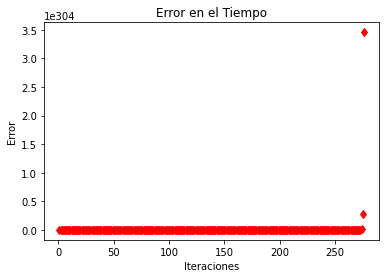

In [169]:
path = "C:\\Users\\Marcela Ambrosio\\OneDrive\\Documentos\\Galileo\\Ciencia de Datos en python\\Proyecto Final\\proyecto_data\\"
file_name = "proyecto_training_data.npy"
pryfinal = regresion_lineal(path,file_name)

